<a href="https://colab.research.google.com/github/Nadaramadan1/Elevvo-internship-projects/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data and explore it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
data.drop(['CustomerID'],axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [3]:
data.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
data.duplicated().sum()

np.int64(0)

In [28]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

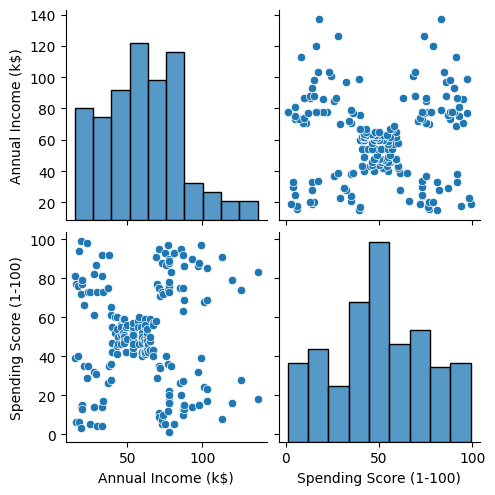

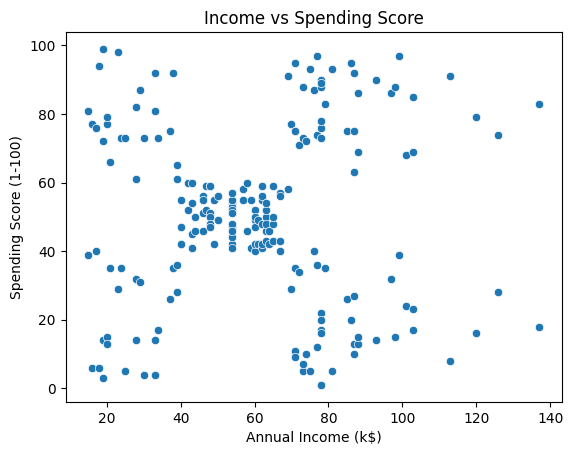

In [5]:
sns.pairplot(data[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title('Income vs Spending Score')
plt.show()


# feature engineering

In [29]:
data['Income_Spending_Ratio'] = data['Annual Income (k$)'] / data['Spending Score (1-100)']

In [30]:
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 25, 45, 65, 100], labels=['Youth', 'Adult', 'Middle-aged', 'Senior'])
data = pd.get_dummies(data, columns=['Age_Group'], drop_first=True)

In [31]:
features = ['Annual Income (k$)', 'Spending Score (1-100)', 'Gender', 'Income_Spending_Ratio']
scaled_data = scaler.fit_transform(data[features])

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])


# K_means clustring

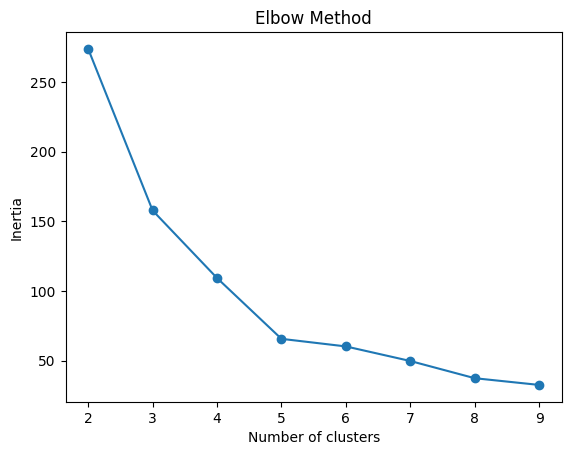

In [33]:
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [34]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters


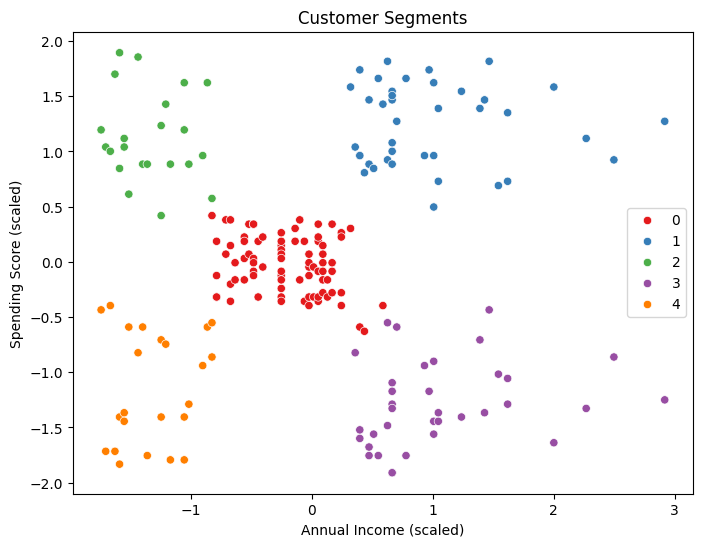

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette='Set1')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


In [36]:
from sklearn.metrics import silhouette_score

# Assuming 'scaled_data' is your standardized input and 'clusters' are the KMeans labels
score = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score for KMeans with 5 clusters: {score:.4f}")


Silhouette Score for KMeans with 5 clusters: 0.5547


In [37]:
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)


         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


# DBSCAN Clustring

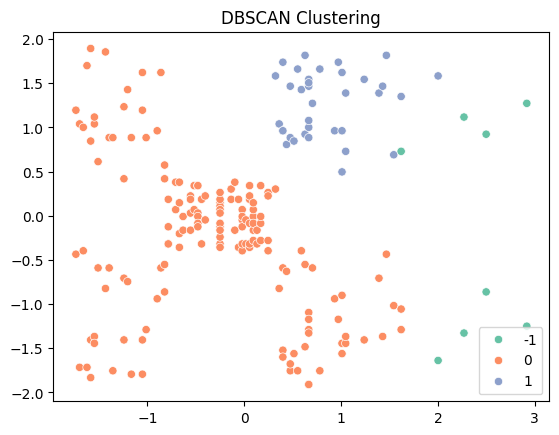

In [38]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_clusters = dbscan.fit_predict(scaled_data)
data['DBSCAN_Cluster'] = db_clusters

sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=db_clusters, palette='Set2')
plt.title('DBSCAN Clustering')
plt.show()
